In [2]:
import numpy as np
from skimage import measure
import plotly.figure_factory as ff
import nibabel as nib

# Suppose mask is your 3D binary numpy array
# mask.shape = (z, y, x), values in {0,1}
# mask = np.random.rand(30, 30, 30) > 0.7  # just an example
img = nib.load("/media/ssd3/diyor/membrain-seg-data/MemBrain_seg_training_data/labelsTr/spinach_tomo02_patch002_split0.nii.gz")

mask = img.get_fdata()
# Extract surface mesh with marching cubes
verts, faces, normals, values = measure.marching_cubes(mask, level=0.5)

# Plot with plotly's create_trisurf
x, y, z = verts.T
i, j, k = faces.T  # face indices

fig = ff.create_trisurf(
    x=x, y=y, z=z,
    simplices=faces,
    colormap="Viridis",
    show_colorbar=False,
)

fig.show()
fig.write_image("mesh_plot.png", width=800, height=800)


/tmp/ipykernel_129926/3822497995.py:28: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




KeyboardInterrupt: 

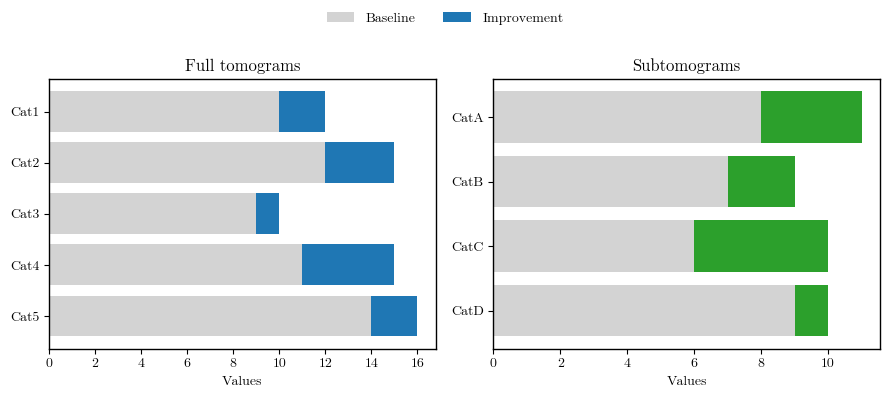

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories1 = ["Cat1", "Cat2", "Cat3", "Cat4", "Cat5"]
categories2 = ["CatA", "CatB", "CatC", "CatD"]

baseline1 = np.array([10, 12, 9, 11, 14])
improvements1 = np.array([2, 3, 1, 4, 2])

baseline2 = np.array([8, 7, 6, 9])
improvements2 = np.array([3, 2, 4, 1])

# Use Computer Modern + LaTeX
plt.rcParams.update({
    "font.family": "CMU Serif",
    # "font.serif": ["Computer Modern Roman"],
    "axes.linewidth": 1,
    "axes.edgecolor": "black"
})

fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=False)

# --- Group 1 ---
y_pos1 = np.arange(len(categories1))
axes[0].barh(y_pos1, baseline1, color="lightgray", label="Baseline")
axes[0].barh(y_pos1, improvements1, left=baseline1, color="#1f77b4", label="Improvement")
axes[0].set_yticks(y_pos1)
axes[0].set_yticklabels(categories1)
axes[0].set_xlabel("Values")
axes[0].set_title("Full tomograms")
axes[0].invert_yaxis()  # top-to-bottom

# --- Group 2 ---
y_pos2 = np.arange(len(categories2))
axes[1].barh(y_pos2, baseline2, color="lightgray", label="Baseline")
axes[1].barh(y_pos2, improvements2, left=baseline2, color="#2ca02c", label="Improvement")
axes[1].set_yticks(y_pos2)
axes[1].set_yticklabels(categories2)
axes[1].set_xlabel("Values")
axes[1].set_title("Subtomograms")
axes[1].invert_yaxis()

# --- Shared legend ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
# axes[0].grid()
axes[0].xaxis.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

fig.savefig("plots/master/barchart.png", dpi=300)


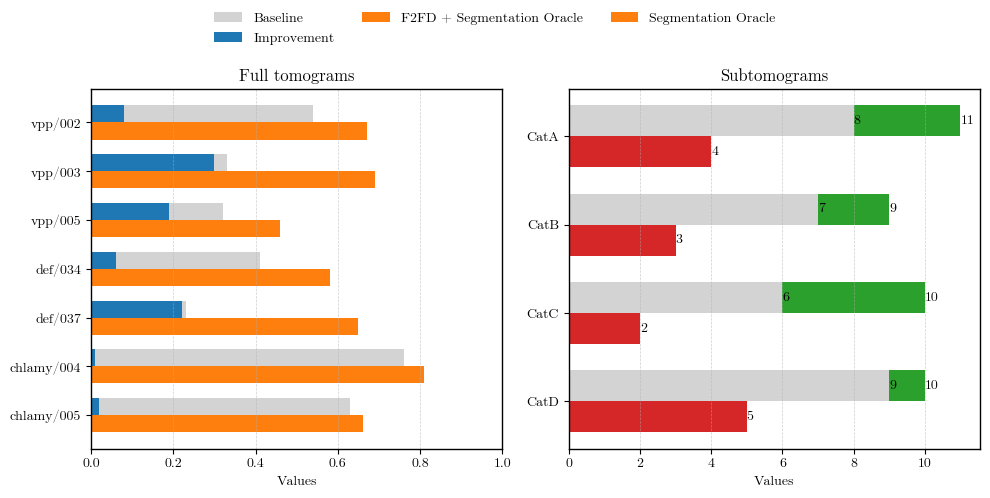

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories1 = ["vpp/002", "vpp/003", "vpp/005", "def/034", "def/037", "chlamy/004", "chlamy/005"]
categories2 = ["CatA", "CatB", "CatC", "CatD"]

baseline1 = np.array([
    0.54,
    0.33,
    0.32,
    0.41,
    0.23,
    0.76,
    0.63,
])
improvements1 = np.array([
    0.62,
    0.63,
    0.51,
    0.47,
    0.45,
    0.77,
    0.65,
]) - baseline1
f2fd_segm1 = np.array([
    0.66,
    0.66,
    0.44,
    0.58,
    0.65,
    0.81,
    0.66,
])  # normal bars next to stacked
segm1 = np.array([
    0.67,
    0.69,
    0.46,
    0.58,
    0.63,
    0.72,
    0.59,
])

baseline2 = np.array([8, 7, 6, 9])
improvements2 = np.array([3, 2, 4, 1])
extra2 = np.array([4, 3, 2, 5])

# Plot setup
plt.rcParams.update({
    "font.family": "CMU Serif",
    "axes.linewidth": 1,
    "axes.edgecolor": "black"
})

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

bar_height = 0.35  # height of a single bar

# --- Group 1 ---
y_pos1 = np.arange(len(categories1))

# stacked bar
bar = axes[0].barh(y_pos1 - bar_height/2, baseline1, height=bar_height, color="lightgray", label="Baseline")
# axes[0].bar_label(bar, padding=10)

bar = axes[0].barh(y_pos1 - bar_height/2, improvements1, height=bar_height, color="#1f77b4", label="Improvement")
# axes[0].bar_label(bar)

# next to stacked bar
bar = axes[0].barh(y_pos1 + bar_height/2, f2fd_segm1, height=bar_height, color="#ff7f0e", label="F2FD + Segmentation Oracle")
# axes[0].bar_label(bar)

bar = axes[0].barh(y_pos1 + bar_height/2, segm1, height=bar_height, color="#ff7f0e", label="Segmentation Oracle")
# axes[0].bar_label(bar)

axes[0].set_yticks(y_pos1)
axes[0].set_yticklabels(categories1)
axes[0].set_xlabel("Values")
axes[0].set_title("Full tomograms")
axes[0].invert_yaxis()
axes[0].xaxis.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)
axes[0].set_xlim([0.0, 1.0])

# --- Group 2 ---
y_pos2 = np.arange(len(categories2))

# stacked bar
# bars = []
bar = axes[1].barh(y_pos2 - bar_height/2, baseline2, height=bar_height, color="lightgray", label="Baseline")
axes[1].bar_label(bar)
bar = axes[1].barh(y_pos2 - bar_height/2, improvements2, left=baseline2, height=bar_height, color="#2ca02c", label="Improvement")
axes[1].bar_label(bar)

# next to stacked bar
bar = axes[1].barh(y_pos2 + bar_height/2, extra2, height=bar_height, color="#d62728", label="Extra")
axes[1].bar_label(bar)

axes[1].set_yticks(y_pos2)
axes[1].set_yticklabels(categories2)
axes[1].set_xlabel("Values")
axes[1].set_title("Subtomograms")
axes[1].invert_yaxis()
axes[1].xaxis.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

fig.savefig("plots/master/barchart_composite.png", dpi=600)


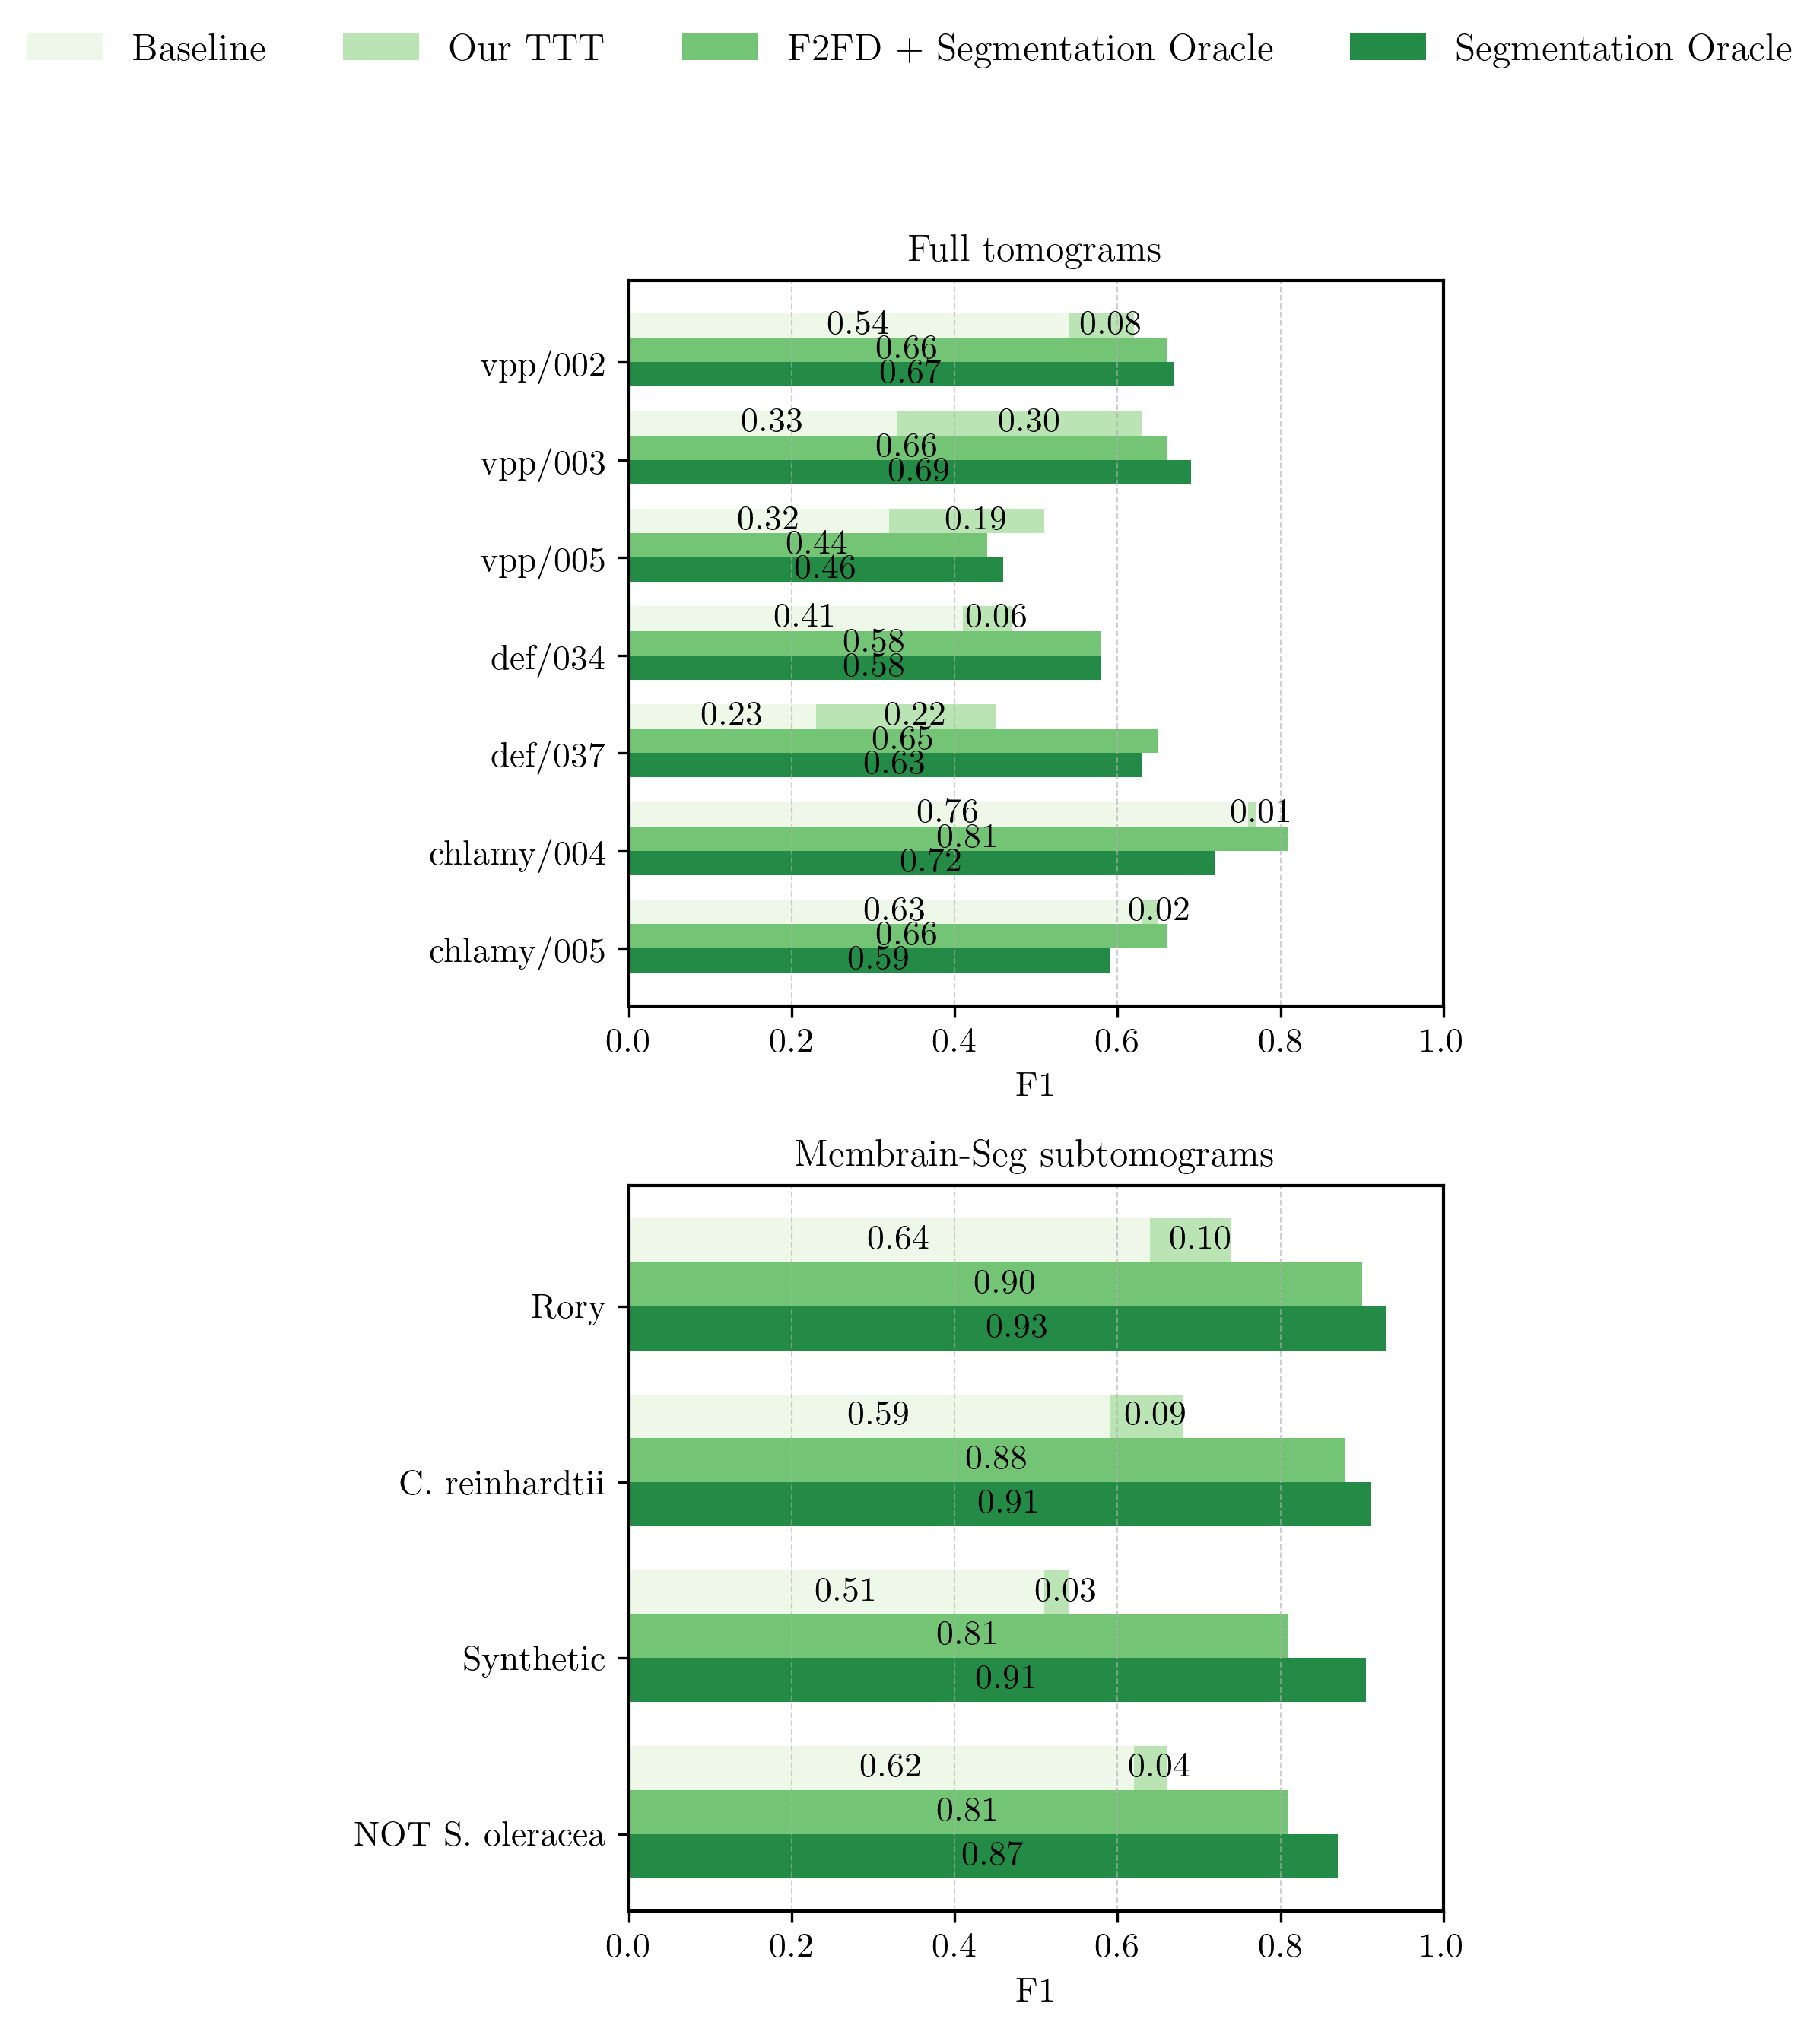

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Example data
categories1 = ["vpp/002", "vpp/003", "vpp/005", "def/034", "def/037", "chlamy/004", "chlamy/005"]
categories2 = ["Rory", "C. reinhardtii", "Synthetic", "NOT S. oleracea"]

baseline1 = np.array([0.54, 0.33, 0.32, 0.41, 0.23, 0.76, 0.63])
improvements1 = np.array([0.62, 0.63, 0.51, 0.47, 0.45, 0.77, 0.65]) - baseline1
f2fd_segm1 = np.array([0.66, 0.66, 0.44, 0.58, 0.65, 0.81, 0.66])
segm1 = np.array([0.67, 0.69, 0.46, 0.58, 0.63, 0.72, 0.59])

baseline2 = np.array([0.64, 0.59, 0.51, 0.62])
improvements2 = np.array([0.74, 0.68, 0.54, 0.66]) - baseline2
f2fd_segm2 = np.array([0.90, 0.88, 0.81, 0.81])
segm2 = np.array([0.93, 0.91, 0.905, 0.87])

# Green ColorBrewer palette (4 colors)
colors_green = ["#edf8e9", "#bae4b3", "#74c476", "#238b45"]

# Plot setup
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "CMU Serif",
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.dpi": 300,         # High resolution
    "savefig.dpi": 300,

})

fig, axes = plt.subplots(2, 1, figsize=(5.2, 9), sharex=False)
bar_height = 0.25

# --- Group 1: 4 bars per category ---
y_pos1 = np.arange(len(categories1))

# stacked bar: baseline + improvement
bar = axes[0].barh(y_pos1 - 1.5*bar_height, baseline1, height=bar_height, color=colors_green[0], label="Baseline")
axes[0].bar_label(bar, fmt='%.2f', padding=3, label_type="center")
bar = axes[0].barh(y_pos1 - 1.5*bar_height, improvements1, left=baseline1, height=bar_height, color=colors_green[1], label="Our TTT")
axes[0].bar_label(bar, fmt='%.2f', padding=3, label_type="center")

# next to stacked bar: f2fd_segm1
bar = axes[0].barh(y_pos1 - 0.5*bar_height, f2fd_segm1, height=bar_height, color=colors_green[2], label="F2FD + Segmentation Oracle")
axes[0].bar_label(bar, fmt='%.2f', padding=3, label_type="center")

# next to that: segm1
bar = axes[0].barh(y_pos1 + 0.5*bar_height, segm1, height=bar_height, color=colors_green[3], label="Segmentation Oracle")
axes[0].bar_label(bar, fmt='%.2f', padding=3, label_type="center")

axes[0].set_yticks(y_pos1)
axes[0].set_yticklabels(categories1)
axes[0].set_xlabel("F1")
axes[0].set_title("Full tomograms")
axes[0].invert_yaxis()
axes[0].xaxis.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)
axes[0].set_xlim([0.0, 1.0])

# --- Group 2 ---
y_pos2 = np.arange(len(categories2))
bar = axes[1].barh(y_pos2 - 1.5*bar_height, baseline2, height=bar_height, color=colors_green[0], label="Baseline")
axes[1].bar_label(bar, fmt='%.2f', padding=3, label_type="center")
bar = axes[1].barh(y_pos2 - 1.5*bar_height, improvements2, left=baseline2, height=bar_height, color=colors_green[1], label="Our TTT")
axes[1].bar_label(bar, fmt='%.2f', padding=3, label_type="center")

# next to stacked bar: f2fd_segm1
bar = axes[1].barh(y_pos2 - 0.5*bar_height, f2fd_segm2, height=bar_height, color=colors_green[2], label="F2FD + Segmentation Oracle")
axes[1].bar_label(bar, fmt='%.2f', padding=3, label_type="center")

# next to that: segm1
bar = axes[1].barh(y_pos2 + 0.5*bar_height, segm2, height=bar_height, color=colors_green[3], label="Segmentation Oracle")
axes[1].bar_label(bar, fmt='%.2f', padding=3, label_type="center")

axes[1].set_yticks(y_pos2)
axes[1].set_yticklabels(categories2)
axes[1].set_xlabel("F1")
axes[1].set_title("MemBrain-seg subtomograms")
axes[1].invert_yaxis()
axes[1].xaxis.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)
axes[1].set_xlim([0.0, 1.0])

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, frameon=False, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

fig.savefig("plots/master/barchart_composite_green.pdf")

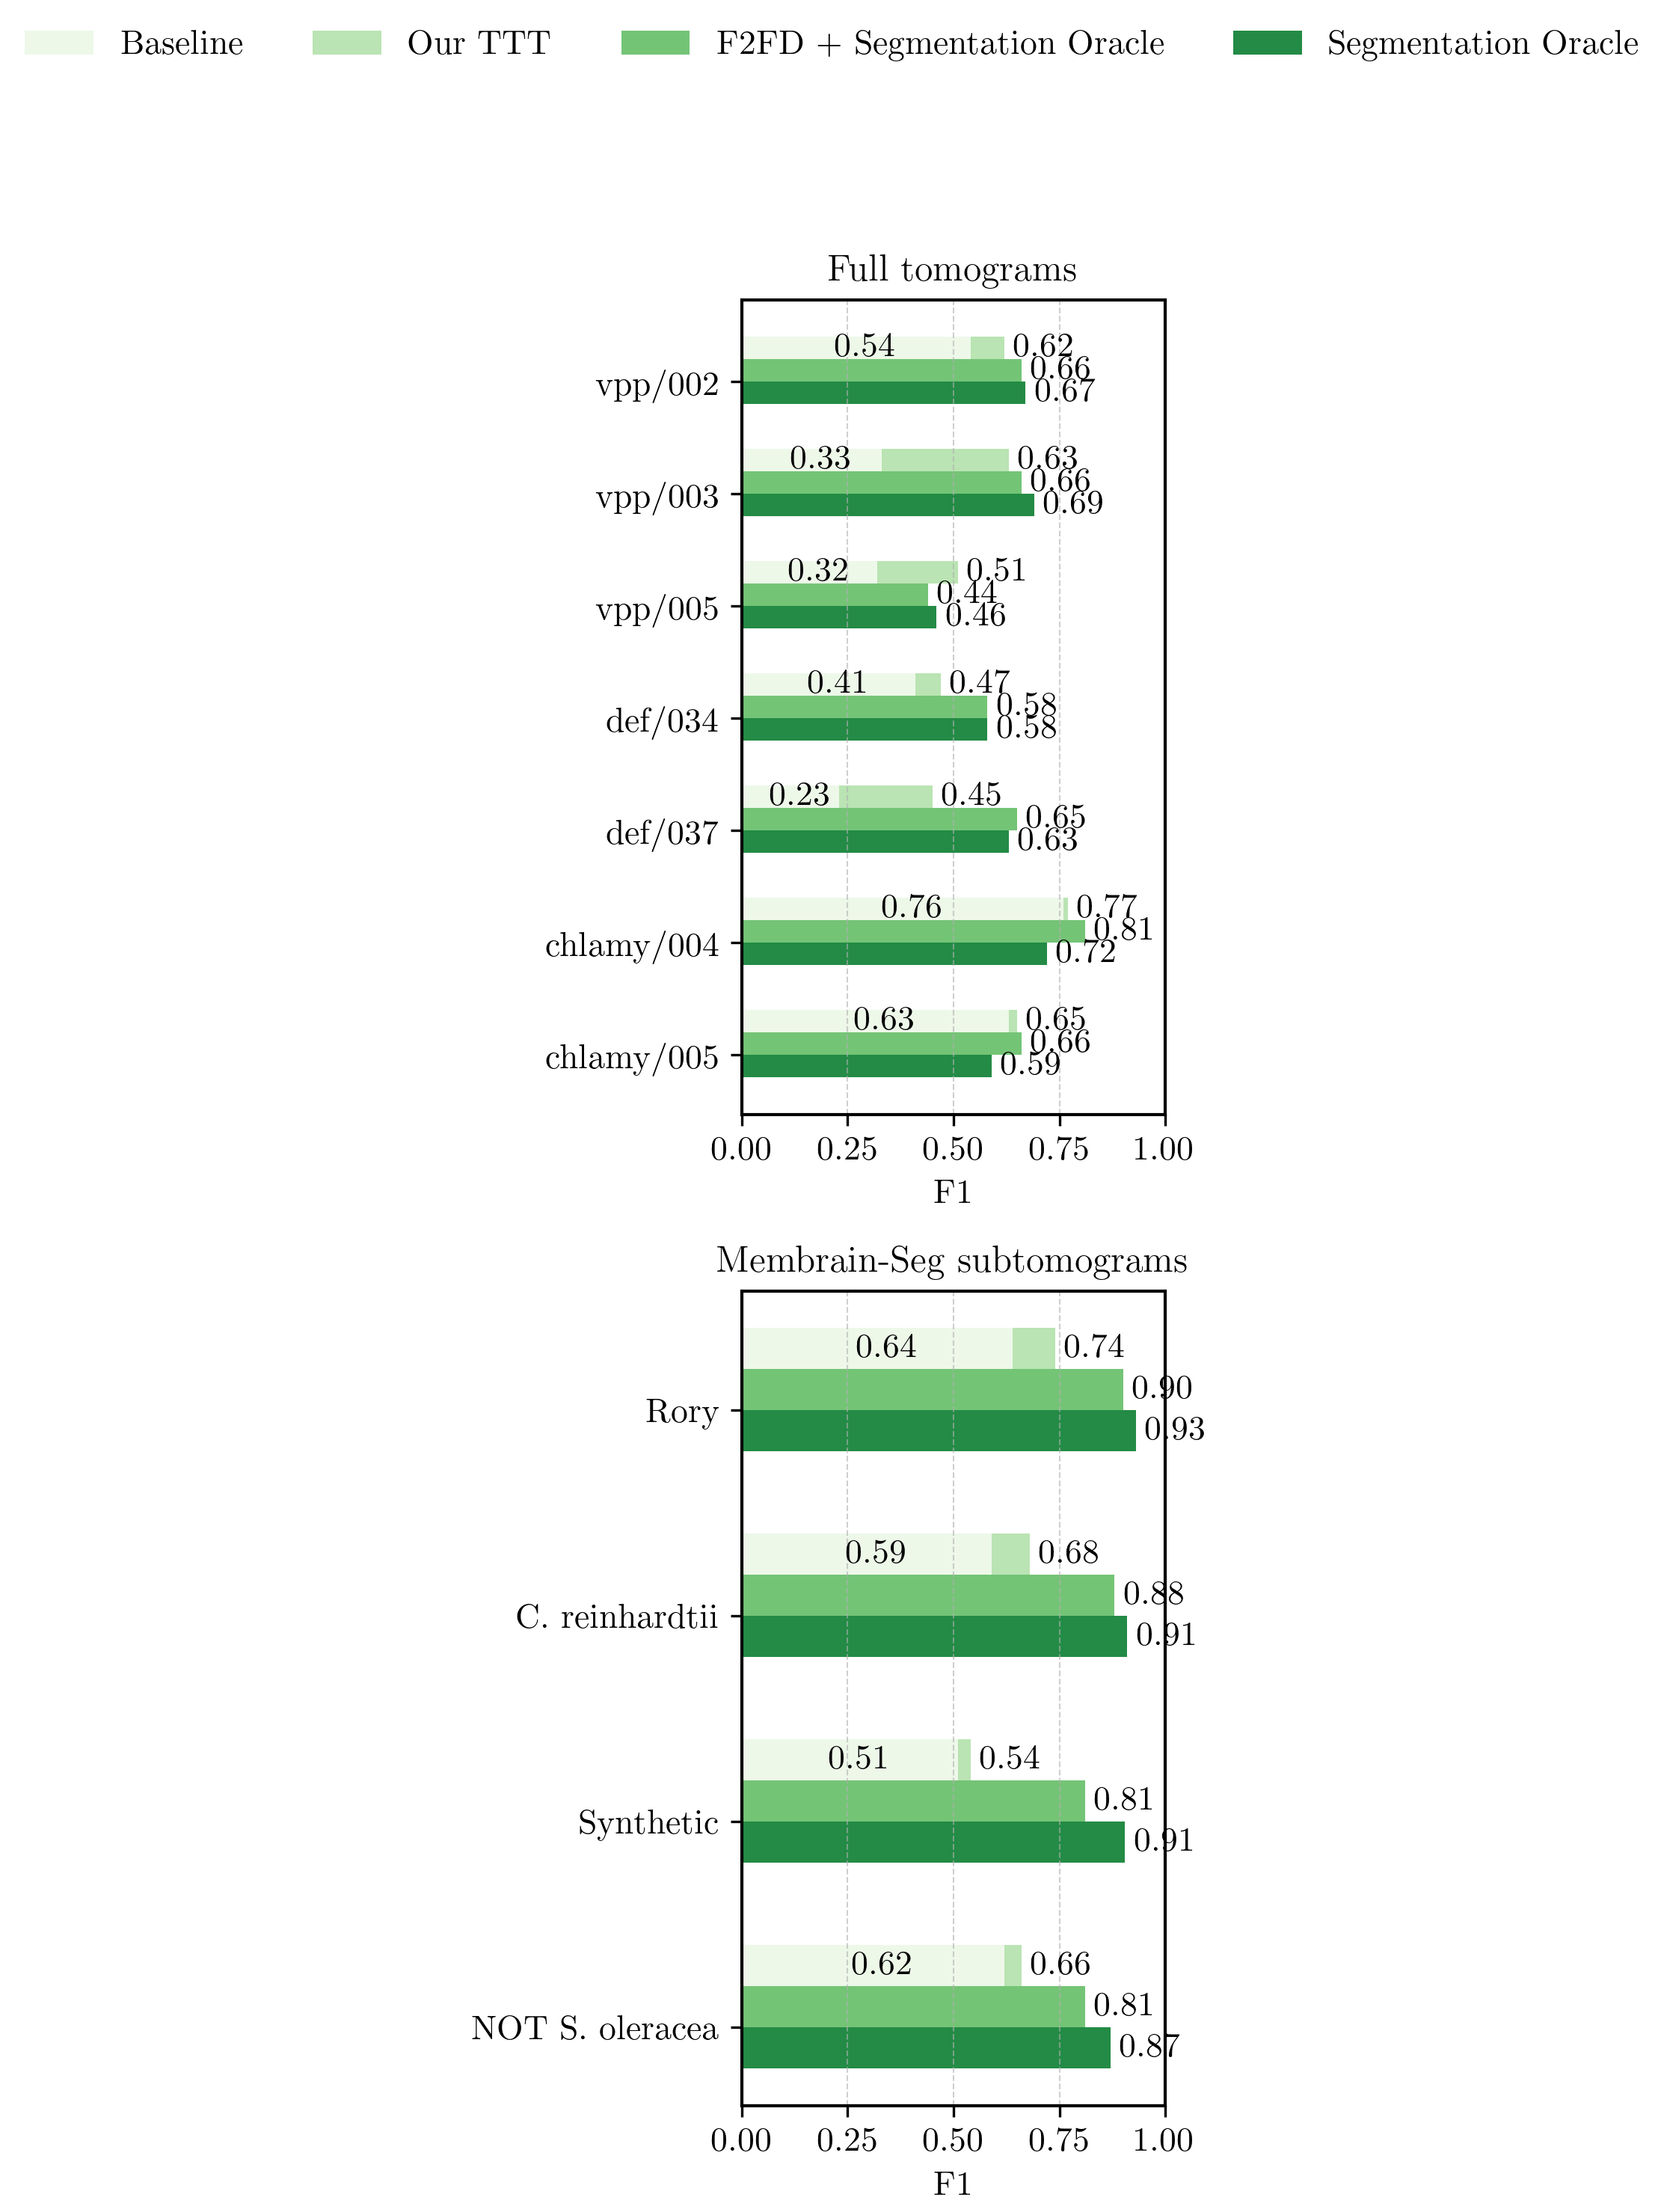

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories1 = ["vpp/002", "vpp/003", "vpp/005", "def/034", "def/037", "chlamy/004", "chlamy/005"]
categories2 = ["Rory", "C. reinhardtii", "Synthetic", "NOT S. oleracea"]

baseline1 = np.array([0.54, 0.33, 0.32, 0.41, 0.23, 0.76, 0.63])
improvements1 = np.array([0.62, 0.63, 0.51, 0.47, 0.45, 0.77, 0.65]) - baseline1
f2fd_segm1 = np.array([0.66, 0.66, 0.44, 0.58, 0.65, 0.81, 0.66])
segm1 = np.array([0.67, 0.69, 0.46, 0.58, 0.63, 0.72, 0.59])

baseline2 = np.array([0.64, 0.59, 0.51, 0.62])
improvements2 = np.array([0.74, 0.68, 0.54, 0.66]) - baseline2
f2fd_segm2 = np.array([0.90, 0.88, 0.81, 0.81])
segm2 = np.array([0.93, 0.91, 0.905, 0.87])

colors_green = ["#edf8e9", "#bae4b3", "#74c476", "#238b45"]

# Plot setup
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "CMU Serif",
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.dpi": 300,         # High resolution
    "savefig.dpi": 300,

})

# Paper width 6.5 inches, 80% -> 0.8*6.5 = 5.2 inches
fig_width = 3.54
fig_height = 10  # maintain similar height as before
fig, axes = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=False)
bar_height = 0.2

# --- Group 1 ---
y_pos1 = np.arange(len(categories1))
bar = axes[0].barh(y_pos1 - 1.5*bar_height, baseline1, height=bar_height, color=colors_green[0], label="Baseline")
axes[0].bar_label(bar, fmt='%.2f', padding=3, label_type="center")
bar = axes[0].barh(y_pos1 - 1.5*bar_height, improvements1, left=baseline1, height=bar_height, color=colors_green[1], label="Our TTT")
axes[0].bar_label(bar, fmt='%.2f', padding=3)
bar = axes[0].barh(y_pos1 - 0.5*bar_height, f2fd_segm1, height=bar_height, color=colors_green[2], label="F2FD + Segmentation Oracle")
axes[0].bar_label(bar, fmt='%.2f', padding=3)
bar = axes[0].barh(y_pos1 + 0.5*bar_height, segm1, height=bar_height, color=colors_green[3], label="Segmentation Oracle")
axes[0].bar_label(bar, fmt='%.2f', padding=3)

axes[0].set_yticks(y_pos1)
axes[0].set_yticklabels(categories1)
axes[0].set_xlabel("F1")
axes[0].set_title("Full tomograms")
axes[0].invert_yaxis()
axes[0].xaxis.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)
axes[0].set_xlim([0.0, 1.0])

# --- Group 2 ---
y_pos2 = np.arange(len(categories2))
bar = axes[1].barh(y_pos2 - 1.5*bar_height, baseline2, height=bar_height, color=colors_green[0], label="Baseline")
axes[1].bar_label(bar, fmt='%.2f', padding=3, label_type="center")
bar = axes[1].barh(y_pos2 - 1.5*bar_height, improvements2, left=baseline2, height=bar_height, color=colors_green[1], label="Our TTT")
axes[1].bar_label(bar, fmt='%.2f', padding=3)
bar = axes[1].barh(y_pos2 - 0.5*bar_height, f2fd_segm2, height=bar_height, color=colors_green[2], label="F2FD + Segmentation Oracle")
axes[1].bar_label(bar, fmt='%.2f', padding=3)
bar = axes[1].barh(y_pos2 + 0.5*bar_height, segm2, height=bar_height, color=colors_green[3], label="Segmentation Oracle")
axes[1].bar_label(bar, fmt='%.2f', padding=3)

axes[1].set_yticks(y_pos2)
axes[1].set_yticklabels(categories2)
axes[1].set_xlabel("F1")
axes[1].set_title("Membrain-Seg subtomograms")
axes[1].invert_yaxis()
axes[1].xaxis.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)
axes[1].set_xlim([0.0, 1.0])

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

fig.savefig("plots/master/barchart_composite_green1.png", dpi=300, bbox_inches='tight')


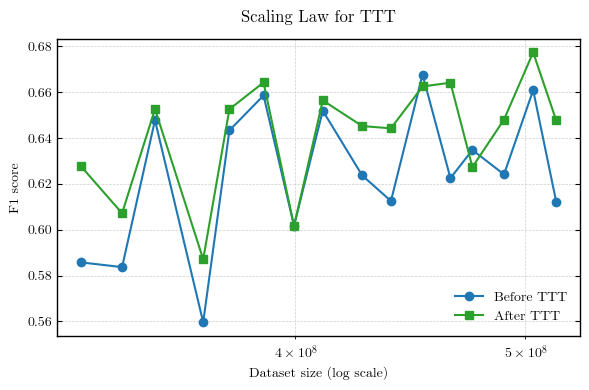

In [12]:
import matplotlib.pyplot as plt
import numpy as np

dataset_sizes = [
    324903941,
    338114122,
    349077100,
    365789607,
    375213353,
    387849640,
    399479640,
    410779670,
    426771596,
    438860989,
    452523685,
    464925447,
    474936210,
    489716732,
    503770238,
    515172548,
]
f1_before = [
    0.58574,
    0.58366,
    0.64781,
    0.55959,
    0.64336,
    0.65861,
    0.60177,
    0.65195,
    0.62372,
    0.61252,
    0.66774,
    0.62251,
    0.63481,
    0.62414,
    0.66092,
    0.61214,
]
f1_after = [
    0.62769,
    0.60718,
    0.65269,
    0.58709,
    0.65261,
    0.6643,
    0.60158,
    0.65646,
    0.64525,
    0.64426,
    0.66253,
    0.6642,
    0.62734,
    0.64807,
    0.67741,
    0.6477,
]
# Example data (replace with yours)
# dataset_sizes = np.array([1e3, 5e3, 1e4, 5e4, 1e5])
# f1_before = np.array([0.62, 0.68, 0.71, 0.76, 0.78])
# f1_after = np.array([0.65, 0.72, 0.76, 0.82, 0.85])

# Optional fake error bars (std dev or CI)
# err_before = np.array([0.01, 0.015, 0.01, 0.012, 0.01])
# err_after = np.array([0.012, 0.014, 0.01, 0.013, 0.011])

# --- Use Computer Modern font ---
plt.rcParams.update({
    "font.family": "CMU Serif",        # fallback Computer Modern clone
    "axes.linewidth": 1,
    "axes.edgecolor": "black"
})

fig, ax = plt.subplots(figsize=(6,4))

# --- Plot with error shading ---
ax.plot(dataset_sizes, f1_before, "-o", color="#1f77b4", label="Before TTT")
# ax.fill_between(dataset_sizes, f1_before - err_before, f1_before + err_before,
#                 color="#1f77b4", alpha=0.2)

ax.plot(dataset_sizes, f1_after, "-s", color="#2ca02c", label="After TTT")
# ax.fill_between(dataset_sizes, f1_after - err_after, f1_after + err_after,
#                 color="#2ca02c", alpha=0.2)

# --- Scaling law style ---
ax.set_xscale("log")
ax.set_xlabel("Dataset size (log scale)")
ax.set_ylabel("F1 score")
ax.set_title("Scaling Law for TTT", pad=12)

# --- Fancy ticks ---
ax.tick_params(direction="in", top=True, right=True)
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

# --- Legend ---
ax.legend(frameon=False, loc="lower right")

plt.tight_layout()
plt.show()
fig.savefig("plots/master/scaling_law.png", dpi=600)

[5.13939005e+05 9.62120622e+00 5.14096694e+05]
[1.12574768e+04 8.09016509e+00 1.13758863e+04]


/tmp/ipykernel_135163/1501247355.py:5: RuntimeWarning: overflow encountered in power
  return a * (x ** b) + c


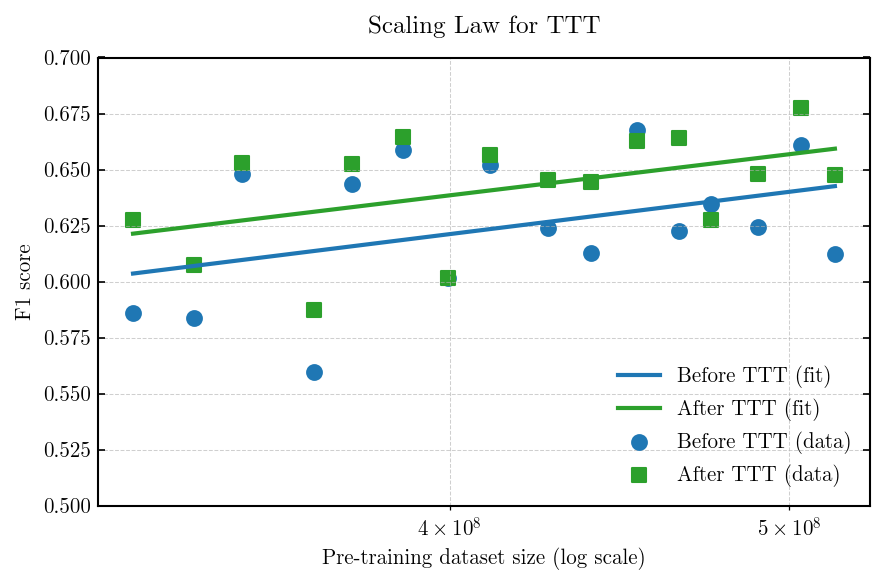

In [82]:
from scipy.optimize import curve_fit

# --- Define a power law function ---
def power_law(x, a, b, c):
    return a * (x ** b) + c

# Fit curve
params_before, cov_before = curve_fit(power_law, dataset_sizes, f1_before, maxfev=50000)
params_after, cov_after = curve_fit(power_law, dataset_sizes, f1_after, maxfev=50000)

sigma_before = np.sqrt(np.diag(cov_before))
sigma_after = np.sqrt(np.diag(cov_after))

print(sigma_before)
print(sigma_after)
n_samples = 1000
x_fit = np.logspace(np.log10(dataset_sizes[0]), np.log10(dataset_sizes[-1]), 200)

# # High-res x for smooth curve
# x_fit = np.logspace(np.log10(dataset_sizes[0]), np.log10(dataset_sizes[-1]), 200)


y_samples_before = np.zeros((n_samples, len(x_fit)))
for i in range(n_samples):
    sample_params = np.random.normal(params_before, sigma_before)
    y_samples_before[i] = power_law(x_fit, *sample_params)
y_lower_before = np.percentile(y_samples_before, 50.0, axis=0)
y_upper_before = np.percentile(y_samples_before, 50.0, axis=0)
y_fit_before = power_law(x_fit, *params_before)

# --- After TTT ---
y_samples_after = np.zeros((n_samples, len(x_fit)))
for i in range(n_samples):
    sample_params = np.random.normal(params_after, sigma_after)
    y_samples_after[i] = power_law(x_fit, *sample_params)
y_lower_after = np.percentile(y_samples_after, 50.0, axis=0)
y_upper_after = np.percentile(y_samples_after, 50.0, axis=0)
y_fit_after = power_law(x_fit, *params_after)

# Compute fitted y
# y_fit_before = power_law(x_fit, *params_before)
# y_fit_after = power_law(x_fit, *params_after)

# --- Plot ---
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "CMU Serif",
    "axes.linewidth": 1,
    "axes.edgecolor": "black"
})

fig, ax = plt.subplots(figsize=(6,4), dpi=150)

# Plot the fitted curves
ax.plot(x_fit, y_fit_before, color="#1f77b4", lw=2, label="Before TTT (fit)")
ax.plot(x_fit, y_fit_after, color="#2ca02c", lw=2, label="After TTT (fit)")

# Confidence intervals
ax.fill_between(x_fit, y_lower_before, y_upper_before, color="#1f77b4", alpha=0.2)
ax.fill_between(x_fit, y_lower_after, y_upper_after, color="#2ca02c", alpha=0.2)

# Optionally, plot data points with error bars
# ax.errorbar(dataset_sizes, f1_before, yerr=err_before, fmt='o', color="#1f77b4", capsize=3)
# ax.errorbar(dataset_sizes, f1_after, yerr=err_after, fmt='s', color="#2ca02c", capsize=3)
ax.scatter(dataset_sizes, f1_before, color="#1f77b4", marker='o', s=50, label="Before TTT (data)")
ax.scatter(dataset_sizes, f1_after, color="#2ca02c", marker='s', s=50, label="After TTT (data)")

# Log scale
ax.set_xscale("log")
ax.set_xlabel("Pre-training dataset size (log scale)")
ax.set_ylabel("F1 score")
ax.set_title("Scaling Law for TTT", pad=12)
ax.set_ylim([0.5, 0.7])

# Ticks and grid
ax.tick_params(direction="in", top=True, right=True)
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

# Legend
ax.legend(frameon=False, loc="lower right")

plt.tight_layout()
plt.show()
fig.savefig("plots/master/scaling_law_power_law.pdf", dpi=300)

In [27]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt


# Paths to your tomogram and label files
tomogram_path = "/mnt/hdd_pool_zion/userdata/diyor/data/deepict/DEF/tomograms/TS_037_trimmed.rec"
labels_path = "/mnt/hdd_pool_zion/userdata/diyor/data/deepict/DEF/labels/TS_037_membranes_trimmed.mrc"
output_png = "slice_with_max_labels.png"


# Load tomogram and labels
with mrcfile.open(tomogram_path, permissive=True) as tomo_mrc:
    tomogram = tomo_mrc.data.copy()


with mrcfile.open(labels_path, permissive=True) as label_mrc:
    labels = label_mrc.data.copy()


# Ensure both have same shape
# assert tomogram.shape == labels.shape, "Tomogram and labels must have the same shape"


# Count positive labels along X-axis slices
x_dim = labels.shape[0]
positive_counts = [np.sum(labels[x, :, :] > 0) for x in range(x_dim)]


# Find slice with maximum positive labels
best_x = int(np.argmax(positive_counts))
print(f"Best slice along x-axis: {best_x}, with {positive_counts[best_x]} positive voxels")

print(tomogram.shape)
# Extract corresponding raw tomogram slice
slice_img = tomogram[80, :, :]


# Normalize for visualization
slice_norm = (slice_img - slice_img.min()) / (slice_img.max() - slice_img.min())


# Save as PNG
plt.imsave(output_png, slice_norm, cmap="gray")
print(f"Saved slice to {output_png}")

Best slice along x-axis: 120, with 22721 positive voxels
(220, 928, 960)
Saved slice to slice_with_max_labels.png


/tmp/ipykernel_4047201/3389787414.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('cool')  # You can choose any colormap


$\texttt{vpp/002}$
Rory


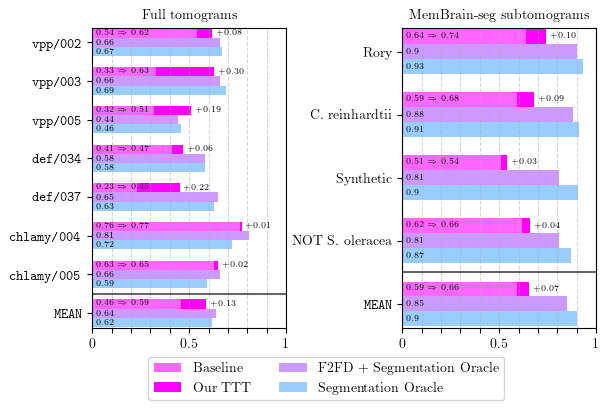

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

FONT_SIZE = 10

# Example data
categories1 = ["vpp/002", "vpp/003", "vpp/005", "def/034", "def/037", "chlamy/004", "chlamy/005", "MEAN"]
categories1 = [r"$\texttt{"+elem+"}$" for elem in categories1]
categories2 = ["Rory", "C. reinhardtii", "Synthetic", r"$\texttt{NOT}$ S. oleracea", r"$\texttt{MEAN}$"]

baseline1 = np.array([0.54, 0.33, 0.32, 0.41, 0.23, 0.76, 0.63])[::-1]
improvements1 = (np.array([0.62, 0.63, 0.51, 0.47, 0.45, 0.77, 0.65])[::-1] - baseline1)
baseline1 = np.insert(baseline1, 0, baseline1.mean())
improvements1 = np.insert(improvements1, 0, improvements1.mean())
f2fd_segm1 = np.array([0.66, 0.66, 0.44, 0.58, 0.65, 0.81, 0.66])[::-1]
f2fd_segm1 = np.insert(f2fd_segm1, 0, f2fd_segm1.mean())
segm1 = np.array([0.67, 0.69, 0.46, 0.58, 0.63, 0.72, 0.59])[::-1]
segm1 = np.insert(segm1, 0, segm1.mean())

# baseline2 = np.array([0.64, 0.59, 0.51, 0.62])[::-1]
# improvements2 = (np.array([0.74, 0.68, 0.54, 0.66])[::-1] - baseline2)
# baseline2 = np.insert(baseline2, 0, baseline2.mean())
# improvements2 = np.insert(improvements2, 0, improvements2.mean())
# f2fd_segm2 = np.array([0.90, 0.88, 0.81, 0.81])[::-1]
# f2fd_segm2 = np.insert(f2fd_segm2, 0, f2fd_segm2.mean())
# segm2 = np.array([0.93, 0.91, 0.905, 0.87])[::-1]
# segm2 = np.insert(segm2, 0, segm2.mean())

baseline2 = np.array([0.57649, 0.57713, 0.53482, 0.58492])[::-1]
improvements2 = (np.array([0.7421, 0.66536, 0.5436, 0.65823])[::-1] - baseline2)
baseline2 = np.insert(baseline2, 0, baseline2.mean())
improvements2 = np.insert(improvements2, 0, improvements2.mean())
f2fd_segm2 = np.array([0.90, 0.88, 0.81, 0.81])[::-1]
f2fd_segm2 = np.insert(f2fd_segm2, 0, f2fd_segm2.mean())
segm2 = np.array([0.93, 0.91, 0.905, 0.87])[::-1]
segm2 = np.insert(segm2, 0, segm2.mean())


matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams.update({'font.size': FONT_SIZE})
TEXTWIDTH = 6.5


BOXPLOT_MEAN_PROPS = dict(marker='o', markerfacecolor='orange', markeredgecolor='black', markersize=2)
BOXPLOT_MEDIAN_PROPS = dict(color="black", markersize=2)
# to rgb
BOXPLOT_COLOR = "#40C0FE"

width = 1*TEXTWIDTH
height = 3.9
font_size = FONT_SIZE
bar_font_size = font_size-4
figlabel = ""

bar_height = 0.8
bar_width = 0.8
method_group_spacing = 3.4  # Keeping group spacing large for separation

in_group_spacing = 0.0 # Small space between bars within each group
ytick_labels = []  # List to hold the PDB names under each group of bars

fig, axes = plt.subplots(1, 2, figsize=(width, height))

colors_green = ["#edf8e9", "#bae4b3", "#74c476", "#238b45"]
colormap = cm.get_cmap('cool')  # You can choose any colormap
norm = Normalize(vmin=-1, vmax=3-1)


for i, (category, base, imp, f2fd, segm) in enumerate(zip(categories1, baseline1, improvements1, f2fd_segm1, segm1)):
    x_positions = np.arange(3) * (bar_width + in_group_spacing) + i * method_group_spacing

    # for j in range(3):
    color = colormap(norm(4-1))  # Get color based on runs value
    axes[0].barh(x_positions[2], base, height=bar_width, color=color, label="Baseline", alpha=0.6)
    base_imp = str(round(base + imp, 2))
    axes[0].text(0.02, x_positions[2], r""+str(round(base, 2))+" $\Rightarrow$ "+base_imp+"", va='center', ha='left', fontsize=bar_font_size, color="black")

    color = colormap(norm(4-2))
    axes[0].barh(x_positions[2], imp, left=base, height=bar_width, color=color, label="Our TTT", alpha=1.0)
# bar = axes[0].barh(y_pos1 - 1.5*bar_height, improvements1, left=baseline1, height=bar_height, color=colors_green[1], label="Our TTT")
    axes[0].text(base + imp + 0.02, x_positions[2], f"+{imp:.2f}", va='center', ha='left', fontsize=bar_font_size, color="black")
    # axes[0].text(base + 0.02, x_positions[2], f"{(base+imp):.2f}", va='center', ha='left', fontsize=bar_font_size, color="black")

    color = colormap(norm(4-3))  # Get color based on runs value
    axes[0].barh(x_positions[1], f2fd, height=bar_width, color=color, label="F2FD + Segmentation Oracle", alpha=0.6)
    axes[0].text(0.02, x_positions[1], round(f2fd, 2), va='center', ha='left', fontsize=bar_font_size, color="black")

    color = colormap(norm(4-4))  # Get color based on runs value
    axes[0].barh(x_positions[0], segm, height=bar_width, color=color, label="Segmentation Oracle", alpha=0.6)
    axes[0].text(0.02, x_positions[0], round(segm, 2), va='center', ha='left', fontsize=bar_font_size, color="black")

    middle_position = np.mean(x_positions)  # Calculate the middle position of the group
    ytick_labels.append(middle_position)  # Collect the middle position for xticks

    if i == 0:
        print(category)
        next_x_positions = np.arange(3) * (bar_width + in_group_spacing) + (i+1) * method_group_spacing
        axes[0].axhline(y=(x_positions[2] + next_x_positions[0])/2, color='black', alpha=0.6)


ytick_labels1 = []
for i, (category, base, imp, f2fd, segm) in enumerate(zip(categories2, baseline2, improvements2, f2fd_segm2, segm2)):
    x_positions = np.arange(3) * (bar_width + in_group_spacing) + i * method_group_spacing

    # for j in range(3):
    color = colormap(norm(4-1))  # Get color based on runs value
    axes[1].barh(x_positions[2], base, height=bar_width, color=color, label="Baseline", alpha=0.6)
    base_imp = str(round(base + imp, 2))
    axes[1].text(0.02, x_positions[2], r""+str(round(base, 2))+" $\Rightarrow$ "+base_imp+"", va='center', ha='left', fontsize=bar_font_size, color="black")

    color = colormap(norm(4-2))
    axes[1].barh(x_positions[2], imp, left=base, height=bar_width, color=color, label="Our TTT", alpha=1.0)
# bar = axes[0].barh(y_pos1 - 1.5*bar_height, improvements1, left=baseline1, height=bar_height, color=colors_green[1], label="Our TTT")
    axes[1].text(base + imp + 0.02, x_positions[2], f"+{imp:.2f}", va='center', ha='left', fontsize=bar_font_size, color="black")

    color = colormap(norm(4-3))  # Get color based on runs value
    axes[1].barh(x_positions[1], f2fd, height=bar_width, color=color, label="F2FD + Segmentation Oracle", alpha=0.6)
    axes[1].text(0.02, x_positions[1], round(f2fd, 2), va='center', ha='left', fontsize=bar_font_size, color="black")

    color = colormap(norm(4-4))  # Get color based on runs value
    axes[1].barh(x_positions[0], segm, height=bar_width, color=color, label="Segmentation Oracle", alpha=0.6)
    axes[1].text(0.02, x_positions[0], round(segm, 2), va='center', ha='left', fontsize=bar_font_size, color="black")

    middle_position = np.mean(x_positions)  # Calculate the middle position of the group
    ytick_labels1.append(middle_position)  # Collect the middle position for xticks
    if i == 0:
        print(category)
        next_x_positions = np.arange(3) * (bar_width + in_group_spacing) + (i+1) * method_group_spacing
        axes[1].axhline(y=(x_positions[2] + next_x_positions[0])/2, color='black', alpha=0.6)


axes[0].grid(True, axis='x', linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]
axes[1].grid(True, axis='x', linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]

xticks = np.linspace(0, 1, 11)
axes[0].set_xticks(xticks)
axes[1].set_xticks(xticks)
xticklabels = axes[0].get_xticklabels()
xticklabels = ["0"] + (len(xticks)-2)*[""] + ["1"]
xticklabels[0] = "0"
xticklabels[5] = "0.5"
xticklabels[-1] = "1"

xticklabels = axes[1].get_xticklabels()
xticklabels = ["0"] + (len(xticks)-2)*[""] + ["1"]
xticklabels[0] = "0"
xticklabels[5] = "0.5"
xticklabels[-1] = "1"

axes[0].set_xticklabels(xticklabels, fontsize=font_size, rotation=0)
axes[1].set_xticklabels(xticklabels, fontsize=font_size, rotation=0)

axes[0].set_title("Full tomograms", fontsize=font_size)
axes[1].set_title("MemBrain-seg subtomograms", fontsize=font_size)

axes[0].set_yticks([])
axes[1].set_yticks([])

axes[0].set_ylim(-0.5, len(categories1)*method_group_spacing-1.3)
axes[1].set_ylim(-0.5, len(categories2)*method_group_spacing-1.3)

ytick_labels = np.array(ytick_labels)
ytick_labels1 = np.array(ytick_labels1)

axes[0].set_yticks(ytick_labels)
axes[1].set_yticks(ytick_labels1)

yticklabels = categories1[::-1]
axes[0].set_yticklabels(yticklabels, rotation=0, fontsize=font_size)  # PDB names under the bars
yticklabels1 = categories2[::-1]
axes[1].set_yticklabels(yticklabels1, rotation=0, fontsize=font_size)  # PDB names under the bars

labels = axes[0].get_yticklabels()

# make legend for entire figure
# reduce horizontal space between subplots
plt.subplots_adjust(wspace=0.6)

handles, labels = axes[0].get_legend_handles_labels()
labels = labels[:4]
handles = handles[:4]
fig.legend(handles, labels, title='', alignment="center", loc="center left", bbox_to_anchor=(0.2, -0.02), ncol=2, fontsize=font_size, title_fontsize=font_size)


if FONT_SIZE != 11:
    filename = "plots/master/simon_test.pdf"

fig.savefig(filename, bbox_inches='tight', pad_inches=0)

plt.show()    

